In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import glob
import numpy as np
import math
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator

In [2]:
beta_inhib = "DOWNLOAD-PvRClVrwiNK-4SJahy2G7J51U5BXANdTUhreUd-4Xps=.csv"
inhib_df = pd.read_csv(beta_inhib, on_bad_lines = 'skip', delimiter = ';')
type(inhib_df.loc[0,'Smiles'])

str

In [3]:
inhib_df.fillna({'Standard Value': 10000}, inplace = True)
df = inhib_df[['Smiles','Standard Value']]
df.dropna(inplace = True)
df['pKd'] = df['Standard Value'].map(lambda x: -math.log10(x))
df

C:\Users\Tim\AppData\Local\Temp\ipykernel_11992\270256531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
C:\Users\Tim\AppData\Local\Temp\ipykernel_11992\270256531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pKd'] = df['Standard Value'].map(lambda x: -math.log10(x))


,Smiles,Standard Value,pKd
0,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...,10000.0,-4.000000
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,10000.0,-4.000000
2,CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21,10000.0,-4.000000
3,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,3.4,-0.531479
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...,10000.0,-4.000000
...,...,...,...
358,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,30000.0,-4.477121
359,COc1ccc(-c2ccc3ncc4c(c3c2)n(-c2ccc(N3CCNCC3)c(...,30000.0,-4.477121
360,CN(C)C1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCO...,30000.0,-4.477121
361,O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C...,30000.0,-4.477121


In [4]:
df['can_smiles'] = df['Smiles'].map(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))

C:\Users\Tim\AppData\Local\Temp\ipykernel_11992\636766911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['can_smiles'] = df['Smiles'].map(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))


C:\Users\Tim\anaconda3\envs\chem\lib\site-packages\rdkit\Chem\PandasTools.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Smiles,Standard Value,pKd,can_smiles,Molecule
0,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...,10000.0,-4.000000,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...,
1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,10000.0,-4.000000,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,
2,CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21,10000.0,-4.000000,CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21,
3,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,3.4,-0.531479,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,
4,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...,10000.0,-4.000000,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nc(-...,
...,...,...,...,...,...
358,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,30000.0,-4.477121,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,
359,COc1ccc(-c2ccc3ncc4c(c3c2)n(-c2ccc(N3CCNCC3)c(...,30000.0,-4.477121,COc1ccc(-c2ccc3ncc4c(c3c2)n(-c2ccc(N3CCNCC3)c(...,
360,CN(C)C1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCO...,30000.0,-4.477121,CN(C)C1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCO...,
361,O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C...,30000.0,-4.477121,O[C@H]1CC[C@H](Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C...,

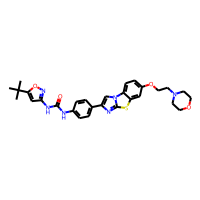
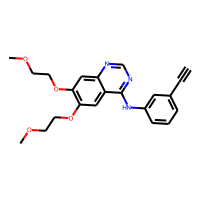
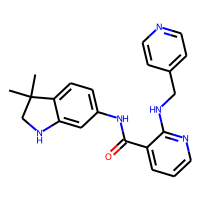
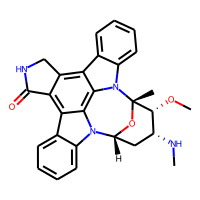
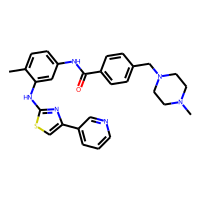
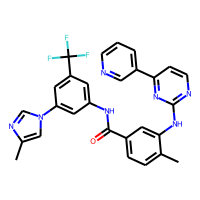
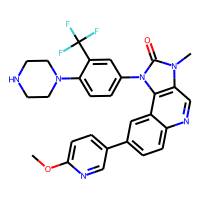
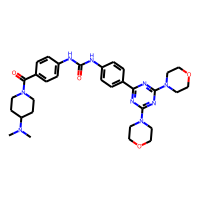
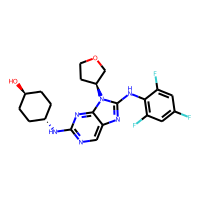
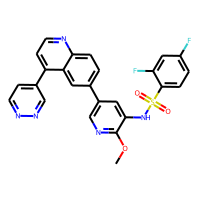

In [6]:
PandasTools.AddMoleculeColumnToFrame(df,'can_smiles','Molecule')
df

In [7]:
df['fp'] = df['Molecule'].map(lambda x: Chem.RDKFingerprint(x))

C:\Users\Tim\AppData\Local\Temp\ipykernel_11992\1616354452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fp'] = df['Molecule'].map(lambda x: Chem.RDKFingerprint(x))


In [8]:
pKd_list = df.pKd.values
smiles_list = df.can_smiles.values
fp_list = df.fp.values
sal_list = []
for i,fp in enumerate(df.fp):
    sim_list = DataStructs.BulkTanimotoSimilarity(fp,fp_list)
    for j in range(0,i):
        ii,jj = i,j
        if pKd_list[i] >= pKd_list[j]:
            ii,jj = i,j
        else:
            jj,ii = i,j
        delta = abs(pKd_list[i]-pKd_list[j])
        sim = sim_list[j]
        sal_list.append([ii,jj,sim,delta/(1-sim+0.001),smiles_list[ii],smiles_list[jj],pKd_list[ii],pKd_list[jj]])

In [33]:
sal_df = pd.DataFrame(sal_list,columns=["i","j","Sim","SAL","SMILES_i","SMILES_j","pKd_i","pKd_j"])
#sal_df.sort_values("SAL",ascending=False,inplace=True)
#sal_df = sal_df[sal_df["SAL"] > 20 ]
#sal_df = sal_df[sal_df["Sim"] < 1 ]
#sal_df = sal_df[sal_df["Sim"] > 0.85 ]
#sal_df = sal_df[sal_df["i"] < 162 ]
sal_df = sal_df.iloc[6647:6649]

In [34]:
PandasTools.AddMoleculeColumnToFrame(sal_df,"SMILES_i","Mol_i")
PandasTools.AddMoleculeColumnToFrame(sal_df,"SMILES_j","Mol_j")

,i,j,Sim,SAL,SMILES_i,SMILES_j,pKd_i,pKd_j,Mol_i,Mol_j
6647,115,92,0.934169,0.364493,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...,-3.716003,-3.740363,,
6648,115,93,0.244969,0.375641,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1,-3.716003,-4.000000,,

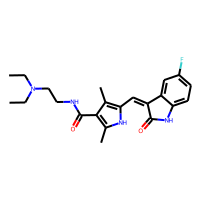
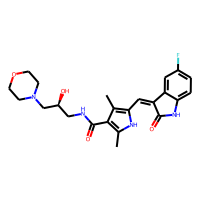
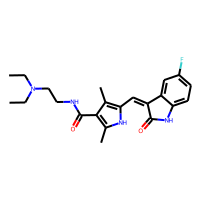
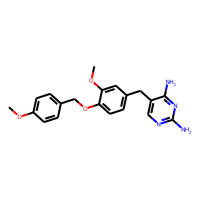

In [35]:
sal_df

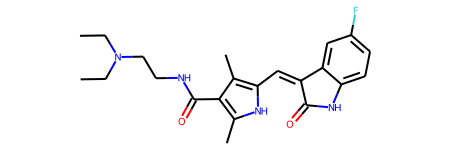

In [36]:
sal_df.loc[6647, 'Mol_i']

In [ ]:
sal_df.loc[6647, 'Mol_j']

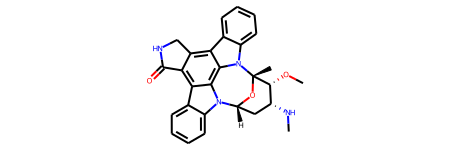

In [13]:
sal_df.loc[48868, 'Mol_i']

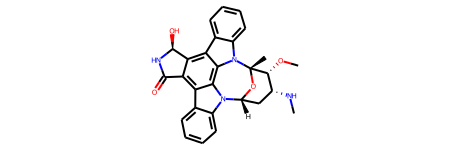

In [35]:
sal_df.loc[48868, 'Mol_j']

In [ ]:
sal_df.loc[26621, 'Mol_i']

In [37]:
sal_df.loc[48868]

i                                                          40
j                                                         313
Sim                                                  0.960997
SAL                                                 59.177373
SMILES_i    CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...
SMILES_j    CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...
pKd_i                                               -0.531479
pKd_j                                               -2.898725
Mol_i       <img data-content="rdkit/molecule" src="data:i...
Mol_j       <img data-content="rdkit/molecule" src="data:i...
Name: 48868, dtype: object